In [135]:
import pickle
import datetime
from dateutil.parser import parse

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np


import nltk
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# gensim
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#nltk.download()

In [263]:
# read data from pickle file
with open ('all_data.pkl', 'rb') as fp:
    df = pickle.load(fp)
    
df.shape

(281105, 3)

In [264]:
# there's some bad data in the snippets.  Drop the rows that have NaN to clean this up
df.dropna(inplace=True)

# take a subset of dataset to try things out
from sklearn.utils import shuffle
df2 = df.sample(n=20)
#df2 = shuffle(df2)

#df2 = df.copy()

# create an new dataframe that combines the headline and snippet (more words in document)

#df2['head_snip'] = df2['headline'].add(df2.snippet)
df2['head_snip'] = df['headline'] + ' '+ df['snippet']

dates = list(df2['date'])

df2.columns

Index(['date', 'headline', 'snippet', 'head_snip'], dtype='object')

In [265]:
documents = list(df2['head_snip'])

In [266]:
df2['head_snip'].to_csv('documents.csv')

## functions

In [109]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print(f"Topic {topic_idx} (with {len(np.unique(W[:,topic_idx]))} articles)")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print('document with index',doc_index)
            print(documents[doc_index])
        print(' ')

In [ ]:
def plot_topic_trend_lda_old(H, W, documents, dates):
    plt.figure(figsize=(17,8))
    plot_data_all = []
    for topic_idx, topic in enumerate(H):
    #for topic_idx in range(0,1):
        count = 0
        print("Topic %d:" % (topic_idx))
        plot_data = {}
        foo = W[:,topic_idx]
        new_array = foo[np.where(foo != 0.)]
        print('documents in topic',len(np.unique(new_array)))
        
        for doc_index in np.argsort(new_array):
            #print(new_array[doc_index])
            if(new_array[doc_index] > 0.5):
                try:
                    #print(doc_index)
                    date_key = dates[int(doc_index)]
                    year, week, weekday = date_key.isocalendar()
                    if year == 2016:   # 2015 gets weeks 1-52, subsequent years have to add multiples of 52 to week number
                        week += 52
                    elif year == 2017:
                        week += 104
                    elif year == 2018:
                        week += 156

                    if week in plot_data:
                        plot_data[week] += 1
                    else:
                        plot_data[week] = 1
                except:
                    print(doc_index, 'in', topic_idx, 'had a problem')

        plt.plot(*zip(*sorted(plot_data.items())),label=f'Topic {topic_idx}')
        plot_data_all.append(plot_data)
    plt.legend(loc='upper left');
    return
#    return plot_data_all


In [316]:
len(lda_W)

20

In [305]:
min_date = min(dates)
max_date = max(dates)
min_year, min_week, weekday = min_date.isocalendar()
max_year, max_week, weekday = max_date.isocalendar()
max_year = 2015

plot_data_all = pd.DataFrame(columns=[['topic','date','num_docs']])
#plot_data_all['date'] = range(min_week,(max_year-min_year)*52+max_week+1)
w = 10
for topic in range(5):
    for week in range(10): 
        plot_data_all.at[w*topic+week,'topic'] = topic
        plot_data_all.at[w*topic+week,'date'] = week
        
plot_data_all['num_docs'] = 0
plot_data_all = plot_data_all.astype('int')
plot_data_all

0 0 0
1 0 1
2 0 2
3 0 3
4 0 4
5 0 5
6 0 6
7 0 7
8 0 8
9 0 9
10 1 0
11 1 1
12 1 2
13 1 3
14 1 4
15 1 5
16 1 6
17 1 7
18 1 8
19 1 9
20 2 0
21 2 1
22 2 2
23 2 3
24 2 4
25 2 5
26 2 6
27 2 7
28 2 8
29 2 9
30 3 0
31 3 1
32 3 2
33 3 3
34 3 4
35 3 5
36 3 6
37 3 7
38 3 8
39 3 9
40 4 0
41 4 1
42 4 2
43 4 3
44 4 4
45 4 5
46 4 6
47 4 7
48 4 8
49 4 9


In [329]:
len(lda_W)

20

In [438]:
plot_topic_trend_lda(lda_H,lda_W,documents,dates)

    topic date num_docs
3       0    3        0
4       0    4        0
5       0    5        0
6       0    6        0
7       0    7        0
8       0    8        0
9       0    9        0
10      0   10        0
11      0   11        0
12      0   12        0
13      0   13        0
14      0   14        0
15      0   15        0
16      0   16        0
17      0   17        0
18      0   18        0
19      0   19        0
20      0   20        0
21      0   21        0
22      0   22        0
23      0   23        0
24      0   24        0
25      0   25        0
26      0   26        0
27      0   27        0
28      0   28        0
29      0   29        0
30      0   30        0
31      0   31        0
32      0   32        0
..    ...  ...      ...
928     4  164        0
929     4  165        0
930     4  166        0
931     4  167        0
932     4  168        0
933     4  169        0
934     4  170        0
935     4  171        0
936     4  172        0
937     4  173  

ValueError: x must be a label or position

<Figure size 1224x576 with 0 Axes>

In [439]:
import matplotlib.pyplot as plt

def plot_topic_trend_lda(H, W, documents, dates):
    plt.figure(figsize=(17,8))
    min_date = min(dates)
    max_date = max(dates)
    min_year, min_week, weekday = min_date.isocalendar()
    max_year, max_week, weekday = max_date.isocalendar()

    plot_data_all = pd.DataFrame(columns=[['topic','date','num_docs']])
    week_start = min_week
    week_end = (max_year-min_year)*52+max_week

    w = week_end - week_start
    for topic in range(len(H)):
        for week in range(week_start,week_end): 
            #print(w*topic+week, topic, week)
            plot_data_all.at[w*topic+week,'topic'] = topic
            plot_data_all.at[w*topic+week,'date'] = week
    plot_data_all['num_docs'] = 0
    plot_data_all = plot_data_all.astype('int')    
    
    #print(plot_data_all)

    for doc_idx in range(W.shape[0]):
        topic_idx = W[doc_idx].argmax()
        #print('doc_idx,topic_idx',doc_idx,topic_idx)
        #print('dates',dates[doc_idx])

        date_key = dates[doc_idx]
        #print('date key',date_key)
        year, week, weekday = date_key.isocalendar()
        #print('week',week)
        if year == 2016:   # 2015 gets weeks 1-52, subsequent years have to add multiples of 52 to week number
            week += 52
        elif year == 2017:
            week += 104
        elif year == 2018:
            week += 156
        #print('plot_data_all index',w*topic_idx+week, week)
        
        #bar = plot_data_all.at[w*topic_idx + week,'num_docs']
        #print('bar',bar)
        #plot_data_all.at[w*topic_idx + week,'num_docs'] = bar + 1
        bar = w*topic_idx + week
        plot_data_all.loc[bar,'num_docs'] +=  1
        
    plot_data_all.plot(x='date', y='num_docs', style='o')

  
    #print(plot_data_all)
#    plot_data = []
#    for index, row in plot_data_all.iterrows():
#        print([row['date'],row['num_docs']])
#        plot_data.append = [row['date'],row['num_docs']]
#    for topic in range(len(H)):
#        foo = plot_data_all[plot_data_all['topic'] == topic]
#        print(foo)
#        plt.plot(foo['date'],foo['num_docs'])
#    plt.legend(loc='upper left');
#    plt.plot(plot_data_all['date'],['num_docs'])
    return plot_data_all
#    return plot_data_all

def plot_topic_trend_nmf(H, W, documents, dates):
    plt.figure(figsize=(17,8))
    plot_data_all = []
    for topic_idx, topic in enumerate(H):
    #for topic_idx in range(0,1):
        count = 0
        print("Topic %d:" % (topic_idx))
        plot_data = {}
        foo = W[:,topic_idx]
        new_array = foo[np.where(foo != 0.)]
        print('documents in topic',len(np.unique(new_array)))

        for doc_index in np.argsort(new_array):
            try:
                #print(doc_index)
                date_key = dates[int(doc_index)]
                year, week, weekday = date_key.isocalendar()
                if year == 2016:
                    week += 52
                elif year == 2017:
                    week += 104
                elif year == 2018:
                    week += 156

                if week in plot_data:
                    plot_data[week] += 1
                else:
                    plot_data[week] = 1
            except:
                print(doc_index, 'in', topic_idx, 'had a problem')

        #plt.plot(*zip(*sorted(plot_data.items())),Ú)
        plot_data_all.append(plot_data)
    plt.legend(loc='upper left');
    #return
    return plot_data_all

## NMF

In [124]:
no_features = 2000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, 
                                   min_df=2, 
                                   max_features=no_features, 
                                   stop_words='english')
#tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [ ]:
print(len(tfidf_feature_names))

In [100]:
tfidf_feature_names

['000',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '30',
 '40',
 '50',
 '8216',
 '8217',
 '8220',
 '8221',
 'abuse',
 'according',
 'accused',
 'act',
 'action',
 'actor',
 'actress',
 'address',
 'administration',
 'africa',
 'african',
 'age',
 'agency',
 'agenda',
 'ago',
 'agreement',
 'ahead',
 'aid',
 'air',
 'al',
 'album',
 'amazon',
 'america',
 'american',
 'americans',
 'amid',
 'andrew',
 'angeles',
 'announced',
 'annual',
 'anti',
 'appeared',
 'appearing',
 'apple',
 'april',
 'archives',
 'area',
 'army',
 'arrested',
 'art',
 'articles',
 'artist',
 'artists',
 'arts',
 'asked',
 'assault',
 'attack',
 'attacks',
 'attention',
 'attorney',
 'august',
 'australia',
 'author',
 'authorities',
 'awards',
 'away',
 'bad',
 'ballet',
 'ban',
 'bank',
 'bar',
 'baseball',
 'based',
 'battle',
 'beach',
 'beat',
 'beauty',
 'began',
 

In [125]:
no_topics = 20

# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

no_top_words = 10
no_top_documents = 2
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)


Topic 0 (with 24921 articles)
new york city times today jersey books guide region listings
document with index 78882
Navigating to New York by the Wind and Waves A canoe sails into New York Harbor, proof of exceptional indigenous navigation....
document with index 79611
Bill Cunningham | Christmas Overload Bill Cunningham weeds through the opulence of New York’s unusually mild Christmas warm-up....
document with index 39027
Dainty Invader: the Deptford Pink The flower is an uninvited lovely of New York’s woods....
document with index 42097
New York City New books include Gerard Koeppel’s “City on a Grid: How New York Became New York.”...
document with index 70876
The Wait If you can wait in New York City, you can wait anywhere....
 
Topic 1 (with 14863 articles)
briefing know need day start evening end wednesday thursday tuesday
document with index 67860
Your Wednesday Briefing Here’s what you need to know to start your day....
document with index 45231
Your Wednesday Briefing Here’s w

Topic 0:
documents in topic 24920
Topic 1:
documents in topic 14862
Topic 2:
documents in topic 17534
Topic 3:
documents in topic 32835
Topic 4:
documents in topic 81936
Topic 5:
documents in topic 11226
Topic 6:
documents in topic 7917
Topic 7:
documents in topic 21496
Topic 8:
documents in topic 9565
Topic 9:
documents in topic 31742
Topic 10:
documents in topic 12178
Topic 11:
documents in topic 15996
Topic 12:
documents in topic 12366
Topic 13:
documents in topic 45363
Topic 14:
documents in topic 21071
Topic 15:
documents in topic 25989
Topic 16:
documents in topic 14121
Topic 17:
documents in topic 10303
Topic 18:
documents in topic 13168
Topic 19:
documents in topic 12714


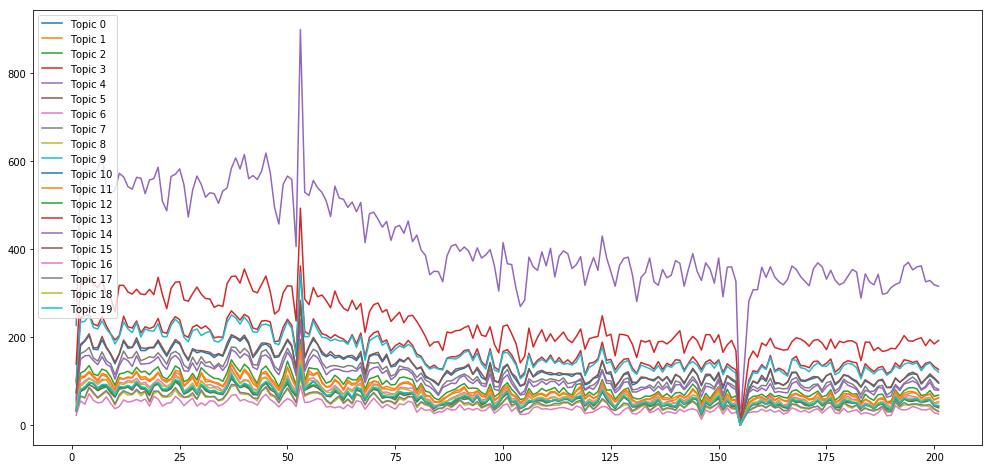

In [200]:
#plot_data_all = plot_topic_trend(nmf_H, nmf_W, tfidf_feature_names, documents, dates)
plot_topic_trend_nmf(nmf_H, nmf_W, documents, dates)

## LDA

In [205]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
#tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
#tf = tf_vectorizer.fit_transform(documents)
tf_vectorizer = CountVectorizer(
            max_df = 0.95, # leave out words that occur in more than 95% of docs
            min_df = 2,    # leave out if occurs less than twice
            ngram_range=(1,3),
            stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [206]:
print(len(tf_feature_names))

25


In [325]:
no_topics = 5

# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.fit_transform(tf)
lda_H = lda_model.components_

In [326]:
no_top_words = 10
no_top_documents = 5
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)

Topic 0 (with 19 articles)
8217 day 8216 news art bridge second new film jersey
document with index 18
Obama Warns Against Government Shutdown President Obama said on Wednesday that Congress should not “play chicken with an $18 trillion economy” over funding for Planned Parenthood....
document with index 14
Greek Lawmakers Pass Bill to Reopen State Broadcaster ERT The highly symbolic move, pledged by the prime minister’s party, would reverse an austerity-driven closure approved by the previous government....
document with index 17
Live From Death Row Erik Eckholm describes waiting for an execution in Oklahoma....
document with index 9
Most Undocumented Immigrants Will Stay Under Obama’s New Policies, Report Says Up to 87 percent of unauthorized immigrants would have &#8220;a degree of protection&#8221; to remain in the country under new enforcement programs, according to a report published Thursday....
document with index 4
Betty Woodman’s Cheery Ceramics Come to London The artist’s wo

In [38]:
# write model to file (or read from file)

write = True # True if write to file
             # False if read from file
if write == True:
    # write data to pickle file
    with open('lda_model.pkl', 'wb') as fp:
        pickle.dump(lda_model, fp)
    with open('nmf_model.pkl', 'wb') as fp:
        pickle.dump(nmf_model, fp)

elif write == False:
    # read data from pickle file
    with open('lda_model.pkl', 'rb') as fp:
        lda_model = pickle.load(fp)
    with open('nmf_model_df95.pkl', 'rb') as fp:
        nmf_model = pickle.load(fp)


In [ ]:
'''
topic_idx = 4
foo = nmf_W[:,topic_idx]
new_array = foo[np.where(foo != 0.)]
for index in np.argsort(new_array):    
    print(index)
print(len(new_array))
'''

In [209]:
for n in range(lda_W.shape[0]):
    topic_most_pr = lda_W[n].argmax()
    print("doc: {} topic: {}\n".format(n,topic_most_pr))

doc: 0 topic: 2

doc: 1 topic: 1

doc: 2 topic: 15

doc: 3 topic: 3

doc: 4 topic: 0

doc: 5 topic: 2

doc: 6 topic: 10

doc: 7 topic: 10

doc: 8 topic: 8

doc: 9 topic: 0

doc: 10 topic: 3

doc: 11 topic: 4

doc: 12 topic: 10

doc: 13 topic: 0

doc: 14 topic: 10

doc: 15 topic: 4

doc: 16 topic: 0

doc: 17 topic: 0

doc: 18 topic: 1

doc: 19 topic: 8



Topic 0:
documents in topic 19
Topic 1:
documents in topic 19
Topic 2:
documents in topic 19
Topic 3:
documents in topic 19
Topic 4:
documents in topic 19
Topic 5:
documents in topic 19
Topic 6:
documents in topic 19
Topic 7:
documents in topic 19
Topic 8:
documents in topic 19
Topic 9:
documents in topic 19
Topic 10:
documents in topic 19
Topic 11:
documents in topic 19
Topic 12:
documents in topic 19
Topic 13:
documents in topic 19
Topic 14:
documents in topic 19
Topic 15:
documents in topic 19
Topic 16:
documents in topic 19
Topic 17:
documents in topic 19
Topic 18:
documents in topic 19
Topic 19:
documents in topic 19


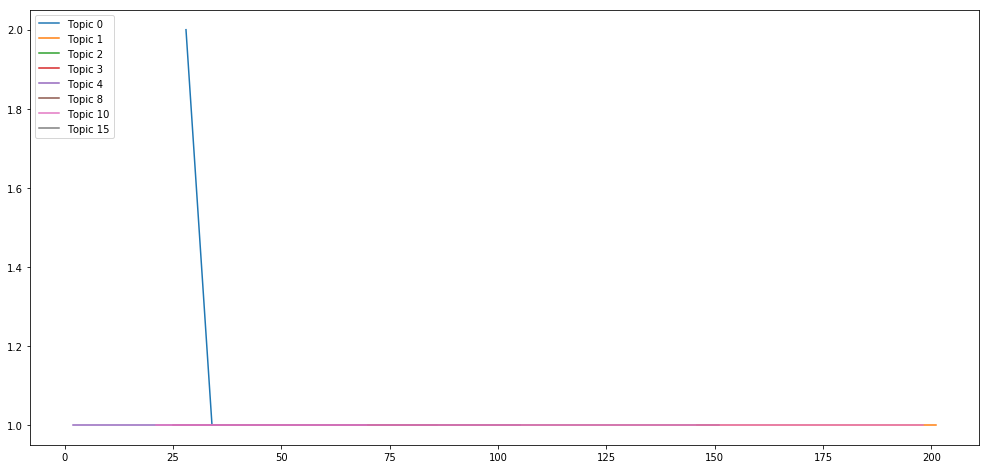

In [210]:
plot_topic_trend_lda(lda_H, lda_W, documents, dates)
#plot_data_all  = plot_topic_trend(lda_H, lda_W, documents, dates)

In [60]:
# write data to csv file for reading into Tableau

outfile = open( 'plot_data_all_lda.csv', 'w' )
for i in range(len(plot_data_all)):
    for key, value in sorted( plot_data_all[:][i].items() ):
        outfile.write( str(i) + ',' + str(key) + ',' + str(value) + '\n' )
#        outfile.write( str(i) + '\t' + str(key) + '\t' + str(value) + '\n' )
#        print( str(i) + '\t' + str(key) + '\t' + str(value) + '\n' )
outfile.close()

In [133]:
import pyLDAvis.gensim
import pyLDAvis.sklearn

import gensim
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer)

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.290497 -0.015496       1        1  12.743880
12     0.212936 -0.219276       2        1  11.598191
3      0.053987  0.231883       3        1   9.353567
6      0.113519 -0.078414       4        1   6.224741
9      0.171473  0.035084       5        1   6.062521
4      0.074334  0.208975       6        1   6.014777
0      0.050082 -0.067426       7        1   5.495560
14     0.004692  0.102144       8        1   4.050973
1      0.011195  0.158933       9        1   3.993171
17    -0.023427 -0.002347      10        1   3.932110
2     -0.064474  0.024415      11        1   3.542542
7     -0.064803 -0.051360      12        1   3.457631
18    -0.042171 -0.128170      13        1   3.448025
8     -0.077592 -0.043676      14        1   3.356689
16    -0.087979 -0.041330      15        1   3.312072
5     -0.101651 -0.059916      16        1   3.112131
15    -0.104260 -0.031858      17        1   2.694473
10    -0.158184 -0.017515      18        1   2.554398
11    -0.122000  0.006333      19        1   2.541835
19    -0.136173 -0.010982      20        1   2.510714, topic_info=       Category          Freq                Term         Total  loglift  \
term                                                                       
167708  Default  17003.000000                 new  17003.000000  30.0000   
276345  Default   7088.000000                york   7088.000000  29.0000   
169401  Default   7068.000000            new york   7068.000000  28.0000   
253968  Default   8073.000000               trump   8073.000000  27.0000   
179566  Default   4971.000000                paid   4971.000000  26.0000   
192600  Default   5553.000000           president   5553.000000  25.0000   
172063  Default   4753.000000              notice   4753.000000  24.0000   
179590  Default   4683.000000         paid notice   4683.000000  23.0000   
66502   Default   4494.000000              deaths   4494.000000  22.0000   
179591  Default   4181.000000  paid notice deaths   4181.000000  21.0000   
172064  Default   4181.000000       notice deaths   4181.000000  20.0000   
64715   Default   4524.000000                 day   4524.000000  19.0000   
48591   Default   4188.000000                city   4188.000000  18.0000   
249429  Default   2559.000000               times   2559.000000  17.0000   
275381  Default   3824.000000               years   3824.000000  16.0000   
7366    Default   4756.000000                8217   4756.000000  15.0000   
215203  Default   5064.000000                said   5064.000000  14.0000   
208804  Default   3384.000000              review   3384.000000  13.0000   
274728  Default   4163.000000                year   4163.000000  12.0000   
189257  Default   2146.000000              police   2146.000000  11.0000   
141721  Default   2538.000000                life   2538.000000  10.0000   
47051   Default   1696.000000               china   1696.000000   9.0000   
21043   Default   1992.000000                 art   1992.000000   8.0000   
218022  Default   2436.000000                says   2436.000000   7.0000   
89831   Default   2444.000000              family   2444.000000   6.0000   
217666  Default   1852.000000                 say   1852.000000   5.0000   
272995  Default   3518.000000               world   3518.000000   4.0000   
266853  Default   3973.000000                week   3973.000000   3.0000   
50390   Default   1853.000000             clinton   1853.000000   2.0000   
76846   Default   2360.000000              donald   2360.000000   1.0000   
...         ...           ...                 ...           ...      ...   
9655    Topic20    398.273626               abuse    399.125131   3.6825   
162804  Topic20    383.765084              movies    384.616590   3.6824   
190596  Topic20    347.037466                pope    347.888972   3.6822   
124761  Topic20    332.951513    

## using Word2Vect

In [ ]:
import os

# Setup nltk corpora path and Google Word2Vec location
google_vec_file = '/Users/dana/metis/GoogleNews-vectors-negative300.bin'

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)

In [ ]:
headline = df2['headline'][0:10]
print(headline)

In [ ]:
print(stop_words)

In [ ]:
headline = df2['headline'][0:10]

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

for index, row in headline.iteritems():
    word_tokens = word_tokenize(row)

    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    stemmed_sentence = [ps.stem(w) for w in filtered_sentence]
    print(stemmed_sentence)#model.word_vec('word')

In [ ]:
for index, row in headline.iteritems():
    word_tokens = word_tokenize(row)

    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    #stemmed_sentence = [ps.stem(w) for w in filtered_sentence]
    stemmed_sentence = filtered_sentence
    print(stemmed_sentence)#model.word_vec('word')
    
    headline_vec = []

    for word in stemmed_sentence:
        try:
            vec = model.word_vec(word)
            headline_vec.append(vec)

        except:
            print('*not found*   ', word)

    print(len(headline_vec))
    print('')

In [ ]:
print(len(headline_vec))